In [1]:
import pandas as pd
wine = pd.read_csv("winequality-red.csv")

In [2]:
wine.head()

,fixed acidity,volatile acidity,citric acid,chlorides,density,pH,alcohol,quality
0,7.4,0.70,0.00,0.076,0.9978,3.51,9.4,5
1,7.8,0.88,0.00,0.098,0.9968,3.20,9.8,5
2,7.8,0.76,0.04,0.092,0.9970,3.26,9.8,5
3,11.2,0.28,0.56,0.075,0.9980,3.16,9.8,6
4,7.4,0.70,0.00,0.076,0.9978,3.51,9.4,5


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fixed acidity     1599 non-null   float64
 1   volatile acidity  1599 non-null   float64
 2   citric acid       1599 non-null   float64
 3   chlorides         1599 non-null   float64
 4   density           1599 non-null   float64
 5   pH                1599 non-null   float64
 6   alcohol           1599 non-null   float64
 7   quality           1599 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 100.1 KB


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>, <Axes: >]], dtype=object)

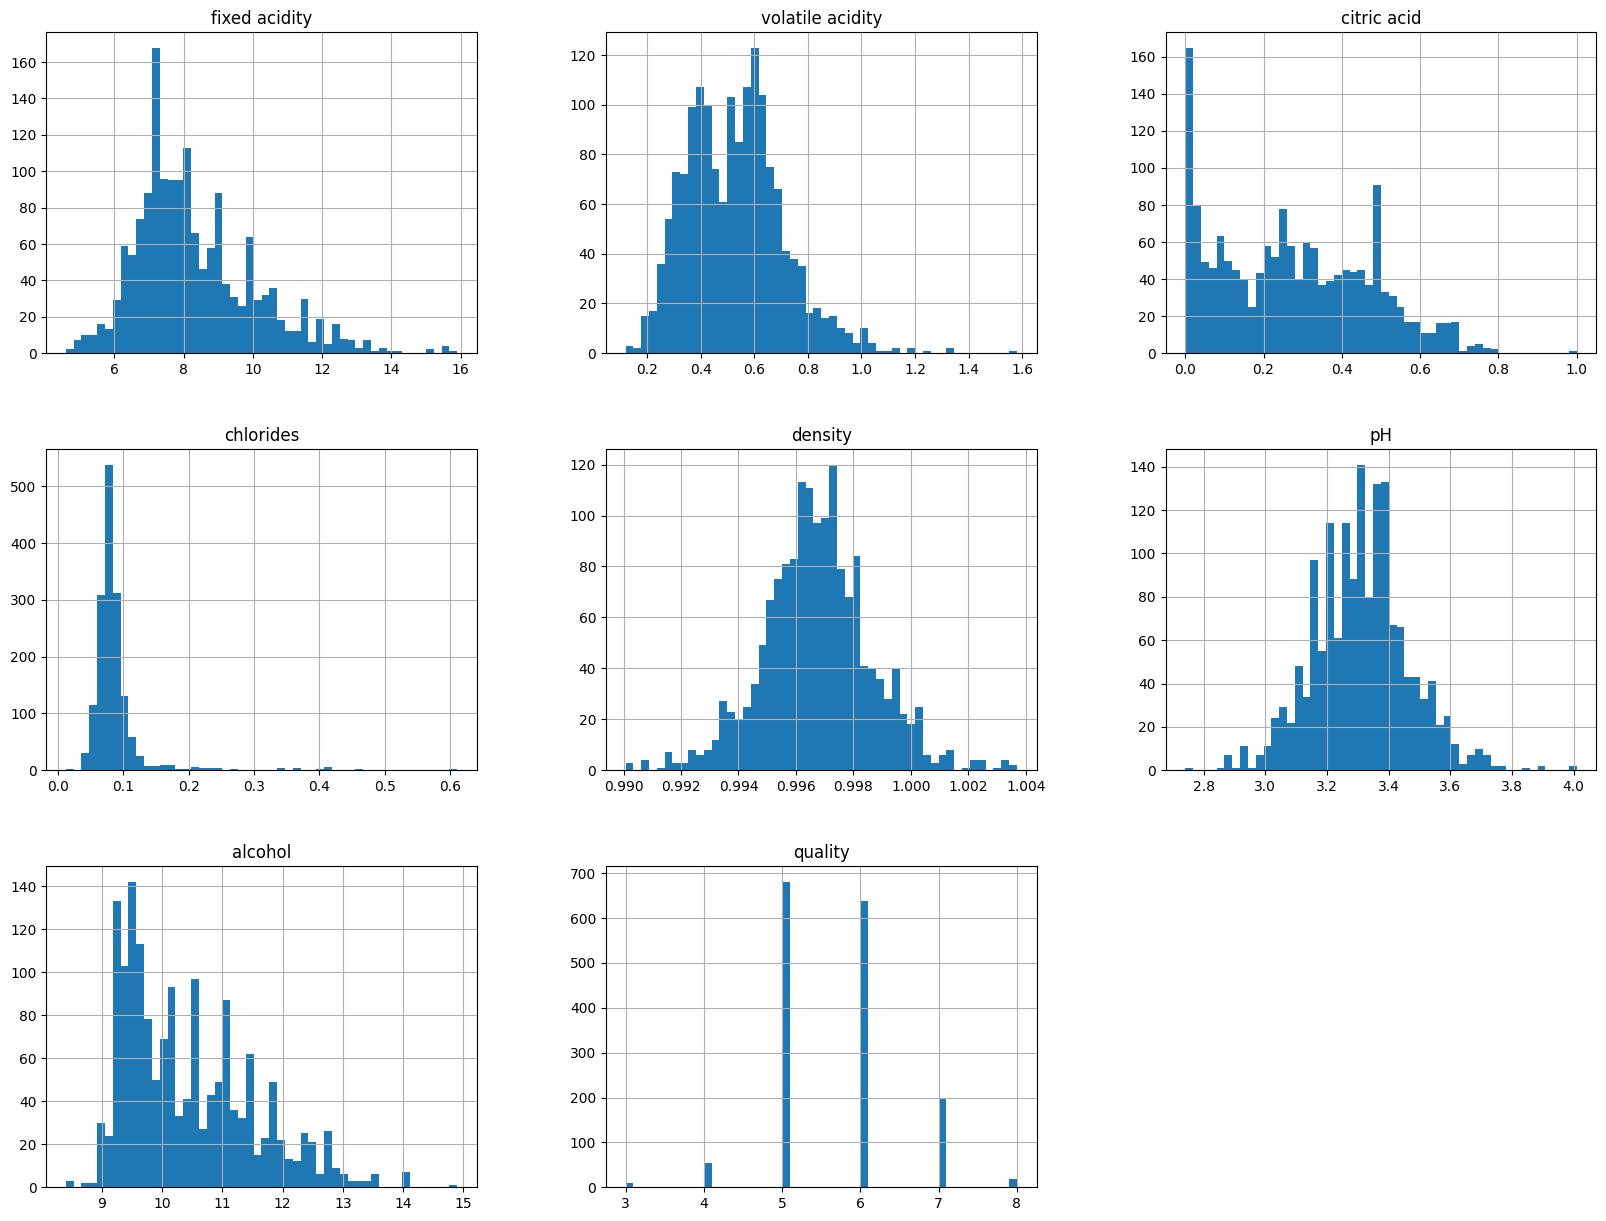

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
wine.hist(bins=50 , figsize=(20 , 15))

In [5]:
import numpy as np
def train_test(data , testR) :
    np.random.seed(42)
    shuffle = np.random.permutation(len(data))
    testSS = int(len(data)*testR)
    testI = shuffle[:testSS]
    trainI = shuffle[testSS :]
    return data.iloc[trainI] , data.iloc[testI]

In [6]:
from sklearn.model_selection import train_test_split
trainSet , testSet = train_test_split(wine , test_size=0.1 , random_state=40)
print(f"Rows in train set : {len(trainSet)}\nRows in test set : {len(testSet)}")

Rows in train set : 1439
Rows in test set : 160


In [7]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1 , test_size=0.1 , random_state=40)
for trainI , testI in split.split(wine , wine['quality']) :
    stratTrain = wine.loc[trainI]
    stratTest = wine.loc[testI]

In [8]:
stratTest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 1049 to 778
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fixed acidity     160 non-null    float64
 1   volatile acidity  160 non-null    float64
 2   citric acid       160 non-null    float64
 3   chlorides         160 non-null    float64
 4   density           160 non-null    float64
 5   pH                160 non-null    float64
 6   alcohol           160 non-null    float64
 7   quality           160 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 11.2 KB


In [9]:
corrM = wine.corr()
corrM['alcohol'].sort_values(ascending=False)

alcohol             1.000000
quality             0.476166
pH                  0.205633
citric acid         0.109903
fixed acidity      -0.061668
volatile acidity   -0.202288
chlorides          -0.221141
density            -0.496180
Name: alcohol, dtype: float64

In [11]:
wine = stratTrain.drop("chlorides",axis=1)
Label = stratTrain["chlorides"].copy()

In [12]:
from sklearn.impute import SimpleImputer  
imputer = SimpleImputer(strategy = "median" )
imputer.fit(wine)

SimpleImputer(strategy='median')

In [13]:
imputer.statistics_.shape

(7,)

In [14]:
x = imputer.transform(wine)
wq = pd.DataFrame(x , columns=wine.columns)
wq.describe()

,fixed acidity,volatile acidity,citric acid,density,pH,alcohol,quality
count,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000
mean,8.314802,0.527731,0.270063,0.996732,3.311571,10.436090,5.635163
std,1.737526,0.177169,0.194940,0.001879,0.155645,1.071647,0.807416
min,4.600000,0.120000,0.000000,0.990070,2.740000,8.400000,3.000000
25%,7.100000,0.397500,0.090000,0.995600,3.210000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,0.996720,3.310000,10.200000,6.000000
75%,9.150000,0.640000,0.420000,0.997800,3.400000,11.100000,6.000000
max,15.900000,1.580000,1.000000,1.003690,4.010000,14.900000,8.000000


In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
myPipe = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scalar',StandardScaler())
])

In [16]:
wineNum = myPipe.fit_transform(wq)
wineNum.shape

(1439, 7)

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(wineNum,Label)

LinearRegression()

In [19]:
sData = wine.iloc[:5]
sLabel = Label.iloc[:5]
prData = myPipe.transform(sData)
model.predict(prData)

array([0.10376252, 0.08795628, 0.11357371, 0.06195018, 0.06145762])

In [20]:
list(sLabel) 

[0.08, 0.079, 0.107, 0.081, 0.076]

In [21]:
from sklearn.metrics import mean_squared_error
winePr = model.predict(wineNum)
mse = mean_squared_error(Label , winePr)
r = np.sqrt(mse)
r

0.04139340424455396

In [22]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model , wineNum , Label , scoring ="neg_mean_squared_error", cv=10)
r_score = np.sqrt(-score)
r_score

array([0.0362814 , 0.0391456 , 0.06062625, 0.0461895 , 0.02926498,
       0.03399351, 0.03696854, 0.04854941, 0.04918244, 0.03043078])

In [23]:
def pr_score(score) :
    print("SCORES : ",score)
    print("MEAN : ", score.mean())
    print("STANDARD DEVIATION : ", score.std())
pr_score(r_score)

SCORES :  [0.0362814  0.0391456  0.06062625 0.0461895  0.02926498 0.03399351
 0.03696854 0.04854941 0.04918244 0.03043078]
MEAN :  0.04106324103349672
STANDARD DEVIATION :  0.00936212345486797


In [24]:
from joblib import dump , load
dump(model,'test.joblib')

['test.joblib']

In [25]:
x_test = stratTest.drop("chlorides",axis=1)
y_test = stratTest["chlorides"].copy()
xtest_pr = myPipe.transform(x_test)
final_pr = model.predict(xtest_pr)
final_mse = mean_squared_error(y_test , final_pr)
final_rmse = np.sqrt(final_mse)
final_rmse

0.045855886823226215

In [26]:
print(final_pr , list(y_test))

[0.08477213 0.05917109 0.08546189 0.08933336 0.07901603 0.0672362
 0.08944475 0.08301151 0.08364543 0.1100832  0.07580863 0.07280898
 0.10437682 0.09958747 0.06479383 0.08278444 0.0608709  0.09447587
 0.10054841 0.13702929 0.06955318 0.08583629 0.09171161 0.08736396
 0.07687205 0.07524079 0.08314637 0.08642302 0.08813106 0.07790396
 0.06974914 0.0979692  0.09223388 0.10535222 0.10173079 0.06871419
 0.10264308 0.06333038 0.10301875 0.09390393 0.08533562 0.09678469
 0.11165482 0.08420599 0.0954918  0.11073003 0.07586559 0.07660771
 0.10216291 0.07608265 0.06622069 0.07570349 0.09324995 0.11808032
 0.08342758 0.09418276 0.10640926 0.11472181 0.08978888 0.09645777
 0.10173617 0.06734084 0.04960015 0.1162222  0.08841519 0.11882247
 0.09326262 0.08081358 0.13552872 0.08801811 0.07102648 0.09162416
 0.08400355 0.0955209  0.08767096 0.06623618 0.07904136 0.09412838
 0.08251855 0.10471186 0.09333972 0.0494427  0.13423782 0.08751052
 0.0668198  0.10509226 0.09404775 0.12727013 0.07750221 0.13524

In [27]:
prData[0]

array([-0.58425314,  0.35158814, -0.05163671, -0.47465971, -0.20290682,
       -0.50042238, -0.78693571])